In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import dump, load
%matplotlib inline

plt.style.use('seaborn')

In [2]:
month = 'nov'
print(month)

# read saved dataset.
df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
df_normalized.head()

# get groups and keys on dataset.

new_groups = df_normalized.groupby('meterid')
new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display('number of valid meterids:', len(new_id_list))

nov


'number of valid meterids:'

118

### Get clustering info

In [3]:
from sklearn.cluster import KMeans

In [4]:
def get_monthly_result(month='nov', n_clusters=3):
    print(month)
    # read saved dataset.
    df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
    df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
    df_normalized.head()

    # get groups and keys on dataset.

    new_groups = df_normalized.groupby('meterid')
    new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

    new_id_list = list(new_keys)
    display('number of valid meterids:', len(new_id_list))

    #  Construct dataframe over which to run correlation analysis.

    df_total = pd.DataFrame()
    display(df_total)
    for key in new_id_list:
        df_i = new_groups.get_group(key).rename(columns={'norm_cumul_value': f'{key}'}).reset_index()    
        df_total = pd.concat([df_total, df_i[f'{key}']], axis=1)

    display(len(df_total))
    #display(df_total)  # column names are meterids

    # get corr matrix

    df_total = df_total.fillna(0)
    df_corr = df_total.corr()  # get correlations between meterids for the month's cumulative vals.
    df_corr = df_corr.fillna(0)
    #display(df_corr)

    # find top n positive correlations per meterid
#     n = 10
#     for meterid in new_id_list[1:2]:    
#         # slice is to show an example.
#         df_corr_sorted = df_corr[f'{meterid}'].sort_values(ascending=False)
#         sr_top5 = df_corr_sorted.iloc[1:1+n]
#         df_top5 = sr_top5.to_frame()
#         df_top5 = df_top5.rename(columns={f'{meterid}': 'r'})

#         data = [meterid for i in range(n)]
#         df_top5 = df_top5.assign(id=data)
#         display(df_top5)

    # clustering

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_corr)
    labels = kmeans.labels_
    print(labels)

    origin_date = df_normalized['index'].iloc[0]

    for cluster_label in range(n_clusters):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
        axes.set_title(f'cluster {cluster_label}; count: {list(labels).count(cluster_label)}')
        axes.set_xlabel(f'hours elapsed since {origin_date}')
        axes.set_ylabel(f'cumul value')
        i = 0
        for key in new_id_list:
            if labels[i] == cluster_label:
                axes.scatter(df_total.index, df_total[f'{key}'])

            i += 1

nov


'number of valid meterids:'

118

""


721

[2 2 2 0 0 0 0 1 1 0 0 0 0 1 2 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 2 2 2 0 2 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 2 1 0 0 0
 2 0 0 0 0 0 0 0 1 2 2 0 0 1 0 1 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 2 2]
dec


'number of valid meterids:'

119

""


745

[0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 2 0 0 2 0 2 0 2 2 0 0 0 0 0 0
 2 0 0 0 0 0 2 0]
jan


'number of valid meterids:'

119

""


745

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0]
feb


'number of valid meterids:'

118

""


697

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1]
mar


'number of valid meterids:'

90

""


745

[0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 2 0 0 2 0 2 0 0 0 2 2 2 0 0 2 0 0 0 0 0 2 1
 0 2 0 2 1 0 0 0 0 0 0 1 2 2 0 2 0 1 2 0 0 2 0 0 0 2 0 2 0 2 0 2 0 2 2 0 0
 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0]


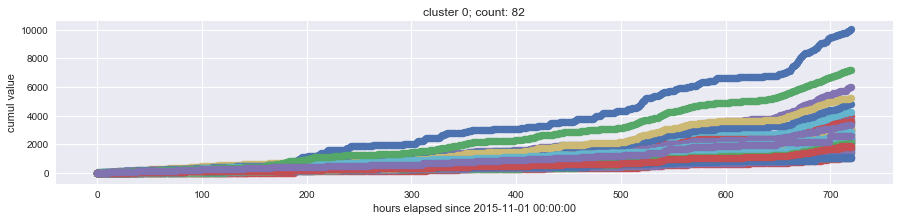

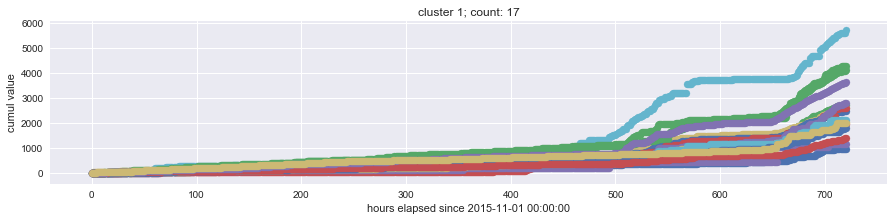

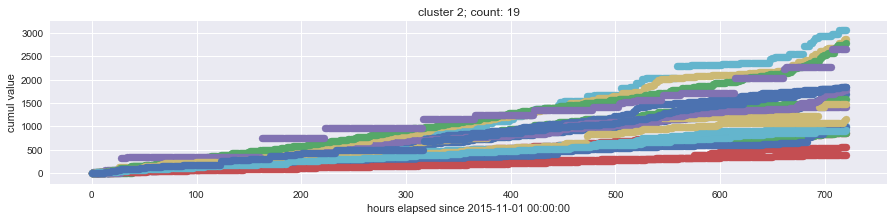

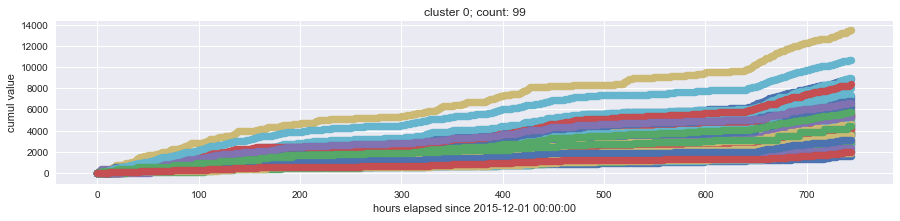

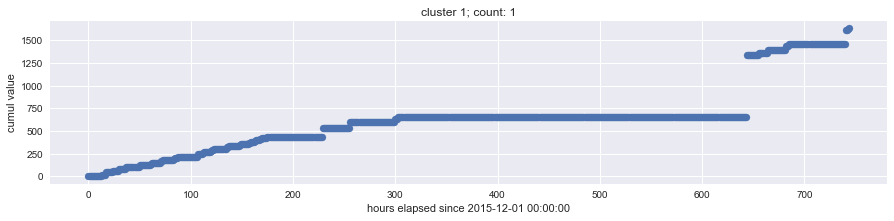

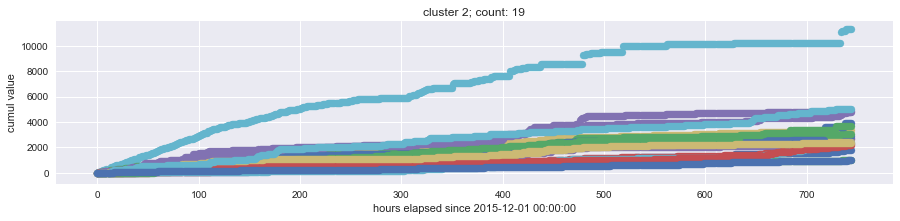

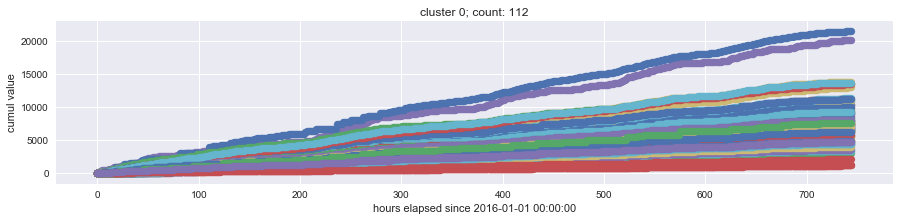

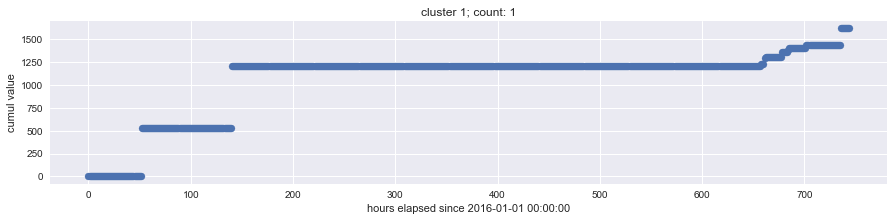

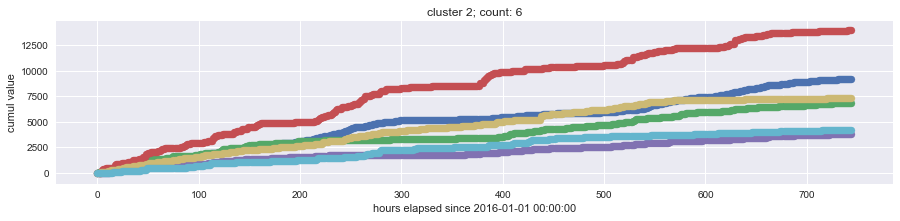

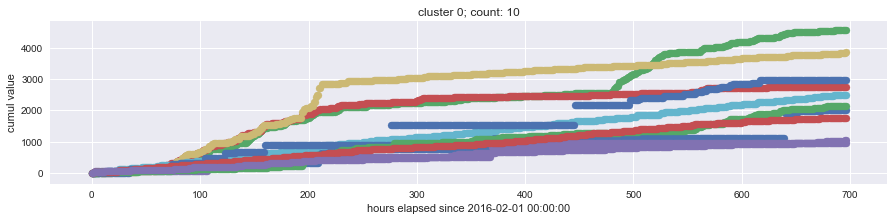

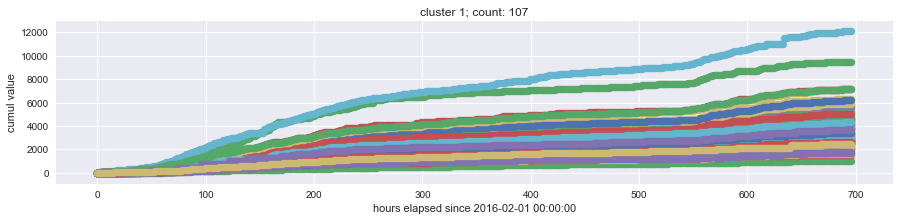

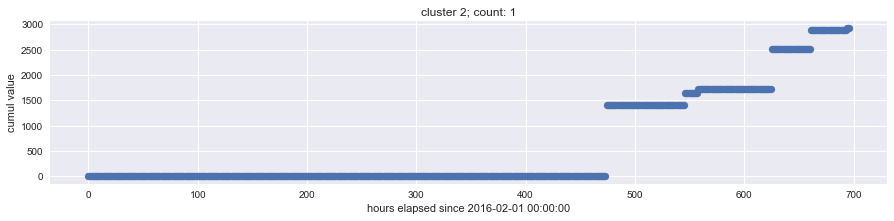

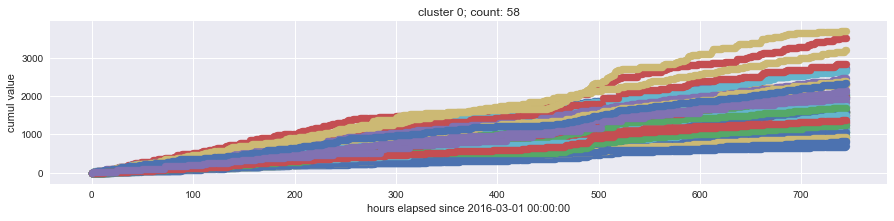

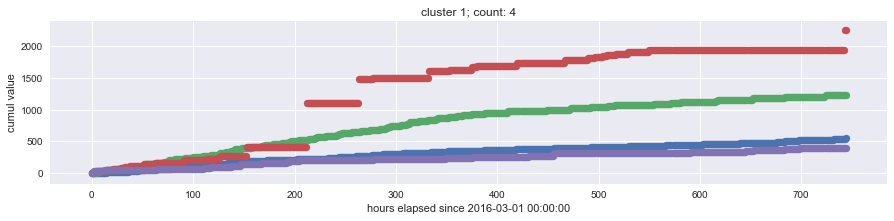

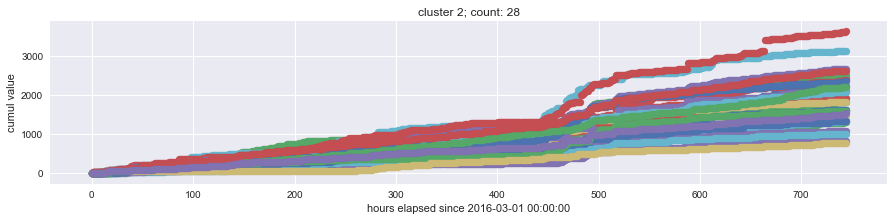

In [5]:
months = ['nov', 'dec', 'jan', 'feb', 'mar']
n_clusters = 3
for month in months:
    get_monthly_result(month, n_clusters)

### Add cluster label to data

In [6]:
# cluster labels for month=nov and n_clusters=3
labels = [2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,\
          1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1,\
          1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1,\
          1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,\
          1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2]

df_new = pd.DataFrame()
for i in range(len(new_id_list)):
    df_i = new_groups.get_group(new_id_list[i])
    df_i['cluster_label'] = labels[i]
    df_new = df_new.append(df_i, ignore_index=True)
df_new.head()

D:\Anaconda3\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,index,marginal_change,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,norm_cumul_value,time_integer,label,cluster_label
0,2015-11-01 00:00:00,0.0,35,67.0,75.0,3.0,0.0,0,0,2
1,2015-11-01 01:00:00,12.0,35,67.0,75.0,3.0,12.0,1,0,2
2,2015-11-01 02:00:00,0.0,35,67.0,75.0,3.0,12.0,2,0,2
3,2015-11-01 03:00:00,2.0,35,67.0,75.0,3.0,14.0,3,0,2
4,2015-11-01 04:00:00,0.0,35,67.0,75.0,3.0,14.0,4,0,2


In [7]:
# split all data into three datasets (train, val, test) by time period.

def split_agg_data(train_size=0.8, valid_size=0.1):
    # df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
    num_samples_per_meterid = len(df_new) / len(new_id_list)  # this must be a whole number
    
    test_end = train_size * num_samples_per_meterid
    val_end = (train_size+valid_size) * num_samples_per_meterid
    
    train_mask = (df_new['time_integer'] >= 0) & (df_new['time_integer'] < test_end)
    val_mask = (df_new['time_integer'] >= test_end) & (df_new['time_integer'] < val_end)
    test_mask = (df_new['time_integer'] >= val_end) & (df_new['time_integer'] < num_samples_per_meterid)
        
    df_train = df_new.loc[train_mask]
    df_val = df_new.loc[val_mask]
    df_test = df_new.loc[test_mask]

    return df_train, df_val, df_test

In [8]:
df_train, df_val, df_test = split_agg_data(train_size=0.8, valid_size=0.1)

In [9]:
x_column_names = ['time_integer', 'label', 'cluster_label',\
                  'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']

X_train = df_train[x_column_names].to_numpy()
X_val = df_val[x_column_names].to_numpy()
X_test = df_test[x_column_names].to_numpy()

y_train = df_train['norm_cumul_value'].to_numpy()
y_val = df_val['norm_cumul_value'].to_numpy()
y_test = df_test['norm_cumul_value'].to_numpy()

In [127]:
from numpy import split, array

def split_dataset(data):
    train_len = 576
    train, test = data[:train_len], data[train_len:-1]
    train = array(split(train, len(train)/24))
    test = array(split(test, len(test)/24))
    return train, test

In [161]:
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=24):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 4))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

In [208]:
df_i = new_groups.get_group(35)
df_i = df_i.set_index(pd.to_datetime(df_i['index']))
length = len(df_i)
df_i = df_i.drop(['index', 'meterid', 'norm_cumul_value', 'label', 'time_integer'], axis=1)
train, test = split_dataset(df_i.values)
train_x, train_y = to_supervised(train, 24)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D

n_steps = 1
n_length = 24
verbose, epochs, batch_size = 0, 70, 16
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
model.add(Flatten())
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse', optimizer='adam')
# fit network
model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)

In [209]:
keep = model

In [254]:
# make a forecast
def forecast(model, history, n_steps, n_length, n_input):
    # flatten data
    data = array(history)
#     display(data.shape)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
#     display(data.shape)
    # retrieve last observations for input data
    input_x = data[-n_input:, :]
#     display(input_x)
#     display(input_x.shape)
    # reshape into [samples, time steps, rows, cols, channels]
    input_x = input_x.reshape((1, n_steps, 1, n_length, 4))
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat

In [255]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [256]:
history = [x for x in train]
n_input = n_steps * n_length

# walk-forward validation over each week
predictions = list()
for i in range(len(test)):
    # predict the week
    yhat_sequence = forecast(model, history, n_steps, n_length, n_input)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next week
    history.append(test[i, :])
# evaluate predictions days for each week
predictions = array(predictions)
score, scores = evaluate_forecasts(test[:, :, 0], predictions)

In [257]:
display(scores)

[2.4417980422354364,
 4.957019914446699,
 4.615773775894284,
 7.562049605354133,
 2.642627658069686,
 4.665433382210972,
 1.8292665977875204,
 3.406691339917208,
 1.8841824538418226,
 3.0154380493709634,
 1.4486735745857204,
 4.461504536809536,
 5.233074992063758,
 6.616287563864701,
 6.616687251914941,
 4.4727409767112585,
 2.858398425035896,
 2.22437285345753,
 2.117115955754149,
 7.507405151801043,
 4.373602022728411,
 6.037751430874464,
 3.7315747684738816,
 5.909522869128691]

In [262]:
display(predictions)
# display(predictions.shape)
display(test)
# display(test.shape)

array([[[1.7440349],
        [2.18611  ],
        [1.9052514],
        [2.1567667],
        [2.0329227],
        [2.1445267],
        [2.2193253],
        [2.2255857],
        [2.1312315],
        [2.2005663],
        [2.3461397],
        [2.448547 ],
        [2.2671795],
        [2.295937 ],
        [2.2087142],
        [2.1955636],
        [2.1783621],
        [2.2139094],
        [2.2728205],
        [2.278612 ],
        [2.2561507],
        [2.2463443],
        [2.2470362],
        [2.2492337]],

       [[2.1858304],
        [2.613781 ],
        [2.1610324],
        [2.088458 ],
        [1.7163818],
        [1.8330764],
        [1.8963671],
        [1.8920103],
        [1.7879363],
        [1.8503938],
        [1.9748825],
        [2.0630043],
        [2.0776694],
        [2.1187377],
        [2.029702 ],
        [2.0278163],
        [1.9593148],
        [1.957039 ],
        [2.0169864],
        [2.0309827],
        [2.0112212],
        [1.9954108],
        [1.9897771],
        [1.

array([[[ 0., 68., 77.,  5.],
        [12., 68., 77.,  5.],
        [12., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 2., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 2., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [12., 68., 77.,  5.],
        [16., 68., 77.,  5.],
        [10., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 2., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 4., 68., 77.,  5.],
        [ 0., 68., 77.,  5.],
        [ 2., 68., 77.,  5.]],

       [[ 0., 71., 91.,  7.],
        [ 0., 71., 91.,  7.],
        [ 0., 71., 91.,  7.],
        [ 0., 71., 91.,  7.],
        [ 2., 71., 91.,  7.],
        [ 0., 71., 91.,  7.],
        [ 0., 71., 91.,  7.],
        [ 0., 71., 91.,  7.],
        [ 0., 71., 91.,  7.],
        

In [274]:
predictions_1d = predictions.flatten()
test = df_i.iloc[577:721]
actual = test['marginal_change'].to_numpy()

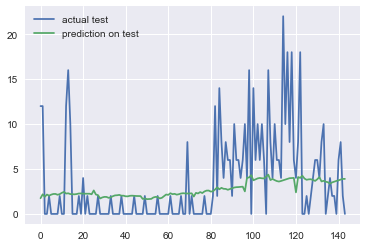

In [276]:
arr = np.arange(start=0, stop=len(actual), step=1).reshape(-1, 1)

plt.plot(arr, actual, label='actual test')
plt.plot(arr, predictions_1d, label='prediction on test')

plt.legend()
plt.show()